In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime

In [64]:
current_time = datetime.now()

# Format the time as "Hour:Minute AM/PM"
formatted_time = current_time.strftime("%I:%M %p")

print("Formatted time:", formatted_time)


Formatted time: 11:05 AM


In [65]:
# read
# n_LF, n_HF, rel_error = np.loadtxt('error_function_11P_MF-Box.txt', unpack=True, usecols=(0,1,2))
n_LF, n_HF, rel_error = np.loadtxt('error_function_goku_pre_frontera.txt', unpack=True, usecols=(0,1,2))

In [66]:
rel_error.shape

(2673,)

In [67]:
def grid_error(n_LF, n_HF, rel_error, n_LF_max = 270, n_HF_max = 9, len_slice = 3):
    X_grid = int(n_LF_max / len_slice)
    Y_grid = int(n_HF_max / len_slice)
    grid_error = np.ones((X_grid, Y_grid))
    n_sample = np.ones((X_grid, Y_grid))
    x = n_HF/len_slice
    y = n_LF/len_slice
    for i in range(len(x)):
        i_y = int(x[i]) - 1
        i_x = int(y[i]) - 1
        if grid_error[i_x, i_y] != 1:
            grid_error[i_x, i_y] += rel_error[i]
            n_sample[i_x, i_y] += 1
        else:
            grid_error[i_x, i_y] = rel_error[i]

    grid_error = grid_error/n_sample
    return grid_error

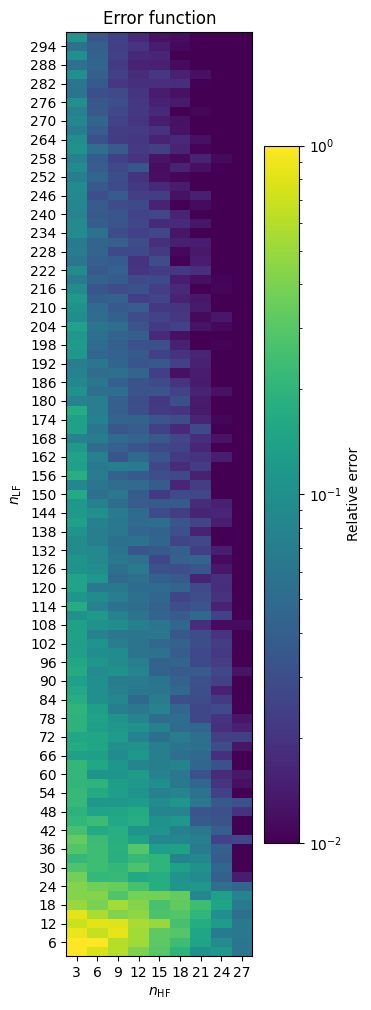

In [68]:
n_LF_max = 297
n_HF_max = 27
len_slice = 3

y = np.linspace(len_slice, n_LF_max, n_LF_max//len_slice)  # Replace with your desired range and resolution
x = np.linspace(len_slice, n_HF_max, n_HF_max//len_slice)  # Replace with your desired range and resolution
X, Y = np.meshgrid(x, y)

# create griddata
Z = grid_error(n_LF, n_HF, rel_error, len_slice=len_slice, n_LF_max=n_LF_max, n_HF_max=n_HF_max)

# Create a colormap to map function values to colors
cmap = plt.get_cmap('viridis')
vmin = 1e-2
vmax = 1

# Create a plot
plt.figure(figsize=(3, 12))
plt.pcolormesh(X, Y, Z, cmap=cmap, norm=matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax))
plt.colorbar(label='Relative error')
plt.title('Error function')
plt.xlabel(r'$n_\mathrm{HF}$')
plt.ylabel(r'$n_\mathrm{LF}$')
xticks = np.arange(3, n_HF_max + 1, 3)
plt.xticks(xticks)
y_ticks = np.arange(6, n_LF_max + 1, 6)
plt.yticks(y_ticks)
plt.show()


In [69]:
Z.shape

(99, 9)

In [70]:
X.shape

(99, 9)

In [71]:
pairs_done = []
for row in range(Z.shape[0]):
    for col in range(Z.shape[1]):
        if Z[row, col] != 1:
            pairs_done.append([3*(row+1), 3*(col+1)])
            

In [72]:
len(pairs_done)

891

In [73]:
pairs_done

[[3, 3],
 [3, 6],
 [3, 9],
 [3, 12],
 [3, 15],
 [3, 18],
 [3, 21],
 [3, 24],
 [3, 27],
 [6, 3],
 [6, 6],
 [6, 9],
 [6, 12],
 [6, 15],
 [6, 18],
 [6, 21],
 [6, 24],
 [6, 27],
 [9, 3],
 [9, 6],
 [9, 9],
 [9, 12],
 [9, 15],
 [9, 18],
 [9, 21],
 [9, 24],
 [9, 27],
 [12, 3],
 [12, 6],
 [12, 9],
 [12, 12],
 [12, 15],
 [12, 18],
 [12, 21],
 [12, 24],
 [12, 27],
 [15, 3],
 [15, 6],
 [15, 9],
 [15, 12],
 [15, 15],
 [15, 18],
 [15, 21],
 [15, 24],
 [15, 27],
 [18, 3],
 [18, 6],
 [18, 9],
 [18, 12],
 [18, 15],
 [18, 18],
 [18, 21],
 [18, 24],
 [18, 27],
 [21, 3],
 [21, 6],
 [21, 9],
 [21, 12],
 [21, 15],
 [21, 18],
 [21, 21],
 [21, 24],
 [21, 27],
 [24, 3],
 [24, 6],
 [24, 9],
 [24, 12],
 [24, 15],
 [24, 18],
 [24, 21],
 [24, 24],
 [24, 27],
 [27, 3],
 [27, 6],
 [27, 9],
 [27, 12],
 [27, 15],
 [27, 18],
 [27, 21],
 [27, 24],
 [27, 27],
 [30, 3],
 [30, 6],
 [30, 9],
 [30, 12],
 [30, 15],
 [30, 18],
 [30, 21],
 [30, 24],
 [30, 27],
 [33, 3],
 [33, 6],
 [33, 9],
 [33, 12],
 [33, 15],
 [33, 18],
 [33

In [74]:
def get_pairs_done(output_file):
    pairs_done = np.loadtxt(output_file, usecols=(0,1))
    return pairs_done

In [75]:
pairs_done = get_pairs_done('error_function.txt')

In [76]:
pairs_done

array([[ 12.,   9.],
       [ 12.,  12.],
       [ 12.,   6.],
       ...,
       [270.,   3.],
       [267.,   3.],
       [ 12.,   3.]])

In [77]:
pairs_done

array([[ 12.,   9.],
       [ 12.,  12.],
       [ 12.,   6.],
       ...,
       [270.,   3.],
       [267.,   3.],
       [ 12.,   3.]])

In [78]:
np.where(3 == pairs_done[:,0])

(array([305, 307, 310, 315, 321, 322, 540, 541, 546, 612, 983, 984]),)

In [79]:
Y

array([[  3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.],
       [  6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.],
       [  9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.],
       [ 12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.],
       [ 15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.],
       [ 18.,  18.,  18.,  18.,  18.,  18.,  18.,  18.,  18.],
       [ 21.,  21.,  21.,  21.,  21.,  21.,  21.,  21.,  21.],
       [ 24.,  24.,  24.,  24.,  24.,  24.,  24.,  24.,  24.],
       [ 27.,  27.,  27.,  27.,  27.,  27.,  27.,  27.,  27.],
       [ 30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.],
       [ 33.,  33.,  33.,  33.,  33.,  33.,  33.,  33.,  33.],
       [ 36.,  36.,  36.,  36.,  36.,  36.,  36.,  36.,  36.],
       [ 39.,  39.,  39.,  39.,  39.,  39.,  39.,  39.,  39.],
       [ 42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.],
       [ 45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.],
       [ 48.,  48.,  48.,  48.,  48.,  48.,  48.,  48.,

In [80]:
X

array([[ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 

In [81]:
# # define the error function
# def error_function(n_LF, n_HF):
#     eta = 1.98 * 4
#     rho = .74
#     beta_L = .73 * 1.
#     beta_H = .39 * 2
#     alpha = .37 * 50
#     beta_H2 = 1.5 * 2
#     return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))

In [82]:
# # define the error function
# def error_function(n_LF, n_HF):
#     eta = 9.998
#     rho = 35.864
#     beta_L = 0.834	
#     beta_H = 1.935
#     alpha_2 = 30.125
#     beta_H2 = 6.722
#     alpha_1 = 41.238

#     sigma_lg_Phi = 0.223   # standard deviation of the log of the error function
#     # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
#     lg_Phi = np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * (n_HF**(beta_H) + alpha_1)) + 1 / (alpha_2 + n_HF**(beta_H2))))
    
#     mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
#     mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
#     median_Phi = 10**lg_Phi
#     return mean_Phi

In [83]:
# # define the error function 1
# def error_function(n_LF, n_HF):
#     eta = 8.904
#     rho = 118.144
#     beta_L = 2.290	
#     rho_H = 2.047
#     alpha_2 = 70.668
#     beta_H2 = 2.337
#     # alpha_1 = 41.238

#     sigma_lg_Phi = 0.242   # standard deviation of the log of the error function
#     # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
#     lg_Phi = np.log10(eta) + np.log10((rho / (n_LF + rho_H * n_HF)**(beta_L)) + 1 / (alpha_2 + n_HF**(beta_H2)))
    
#     mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
#     mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
#     median_Phi = 10**lg_Phi
#     return median_Phi

In [84]:
# # define the error function 2
# def error_function(n_LF, n_HF):
#     eta = 9.965
#     '''rho = pm.Uniform("rho", lower=0, upper=10)
#     beta_L = pm.Uniform("beta_L", lower=0, upper=3)
#     beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
#     rho = 2574190.672	
#     beta_L = 1.305	
#     beta_H = 4.782
#     # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
#     beta_H2 = 2.551
#     # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
#     alpha_L = 30.366
#     alpha_1 = 26.306
#     alpha_2 = 6.645	

#     sigma_lg_Phi = 0.213	   # standard deviation of the log of the error function
#     # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
#     lg_Phi = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF + alpha_L)**(beta_L-1) * (n_HF + alpha_1)**(beta_H-1) ) + 1 / (alpha_2 + n_HF)**(beta_H2))
    
#     mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
#     mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
#     median_Phi = 10**lg_Phi
#     return median_Phi

In [85]:
# # define the error function 3
# def error_function(n_LF, n_HF):
#     eta = 10.172	
#     '''rho = pm.Uniform("rho", lower=0, upper=10)
#     beta_L = pm.Uniform("beta_L", lower=0, upper=3)
#     beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
#     rho = 63.564
#     beta_L = 2.240
#     beta_H = 2.937
#     # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
#     beta_H2 = 2.209
#     # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
#     alpha_L = -0.869	
#     # alpha_1 = 9.614
#     alpha_2 = 4.852

#     sigma_lg_Phi = 0.250	   # standard deviation of the log of the error function
#     # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
#     lg_Phi = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF)**beta_H * (n_LF + alpha_L)**(beta_L-beta_H) ) + 1 / (alpha_2 + n_HF)**(beta_H2))
    
#     mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
#     mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
#     median_Phi = 10**lg_Phi
#     return median_Phi

In [86]:
# # define the error function
# def error_function(n_LF, n_HF):
#     eta = 10.000	
#     rho = 136.554
#     beta_L = 1.037
#     beta_H = 2.013
#     alpha_2 = 5.073
#     beta_H2 = 6.383
#     alpha_1 = 55.954
#     alpha_L = 11.465	

#     sigma_lg_Phi = 0.218   # standard deviation of the log of the error function
#     # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
#     lg_Phi = np.log10(eta) + np.log10((rho / ((n_LF**(beta_L) + alpha_L) * (n_HF**(beta_H) + alpha_1)) + 1 / (alpha_2 + n_HF**(beta_H2))))
    
#     mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
#     mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
#     median_Phi = 10**lg_Phi
#     return mean_Phi

In [87]:
# # define the error function 5
# def error_function(n_LF, n_HF):
#     eta = 9.844
#     '''rho = pm.Uniform("rho", lower=0, upper=10)
#     beta_L = pm.Uniform("beta_L", lower=0, upper=3)
#     beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
#     rho = 4735.934
#     beta_L = 1.435
#     beta_H = 2.933
#     # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
#     beta_H2 = 6.001
#     # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
#     alpha_L = 36.815
#     alpha_1 = 57.329
#     alpha_2 = 5.147

#     sigma_lg_Phi = 0.219	   # standard deviation of the log of the error function
#     # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
#     lg_Phi = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF**(beta_L-1) + alpha_L) * (n_HF**(beta_H-1) + alpha_1) ) + 1 / (alpha_2 + n_HF**(beta_H2)))
    
#     mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
#     mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
#     median_Phi = 10**lg_Phi
#     return mean_Phi

In [88]:
# # define the error function 6
# def error_function(n_LF, n_HF):
#     eta = 9.877
#     '''rho = pm.Uniform("rho", lower=0, upper=10)
#     beta_L = pm.Uniform("beta_L", lower=0, upper=3)
#     beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
#     rho = 4763.987
#     beta_L = 1.406
#     beta_H = 2.948	
#     # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
#     # beta_H2 = 6.001
#     # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
#     alpha_L = 37.023	
#     alpha_1 = 57.329
#     # alpha_2 = 5.147

#     sigma_lg_Phi = 0.219	   # standard deviation of the log of the error function
#     # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
#     lg_Phi = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF**(beta_L-1) + alpha_L) * (n_HF**(beta_H-1) + alpha_1) ) )
    
#     mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
#     mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
#     median_Phi = 10**lg_Phi
#     return mean_Phi

In [138]:
# define the error function 7 par modes
def error_function(n_LF, n_HF):
    eta = 10.903329861345608
    '''rho = pm.Uniform("rho", lower=0, upper=10)
    beta_L = pm.Uniform("beta_L", lower=0, upper=3)
    beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
    rho = 36019.20443379628
    beta_L = 1.0779450437785218
    beta_H = 4.212082781785061
    # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
    # beta_H2 = 3.486
    # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
    alpha_L = 8.271239478828562
    alpha_1 = 18.303374699519214
    alpha_2 = 9.798419475833947

    sigma_lg_Phi = 0.21474781516995434	   # standard deviation of the log of the error function
    # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
    lg_Phi = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF + alpha_L)**(beta_L-1) * (n_HF + alpha_1)**(beta_H-1) ) + 1 / (alpha_2 + n_HF)**(beta_H))
    
    mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
    mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
    median_Phi = 10**lg_Phi
    return mean_Phi

In [139]:
# # define the error function 7 par means
# def error_function(n_LF, n_HF):
#     eta = 10.912	
#     '''rho = pm.Uniform("rho", lower=0, upper=10)
#     beta_L = pm.Uniform("beta_L", lower=0, upper=3)
#     beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
#     rho = 56564.792
#     beta_L = 1.077	
#     beta_H = 4.231	
#     # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
#     # beta_H2 = 3.486
#     # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
#     alpha_L = 8.261	
#     alpha_1 = 18.469
#     alpha_2 = 9.758

#     sigma_lg_Phi = 0.215	   # standard deviation of the log of the error function
#     # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
#     lg_Phi = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF + alpha_L)**(beta_L-1) * (n_HF + alpha_1)**(beta_H-1) ) + 1 / (alpha_2 + n_HF)**(beta_H))
    
#     mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
#     mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
#     median_Phi = 10**lg_Phi
#     return mean_Phi

In [140]:
error_function(600,22)

0.003025046248329702

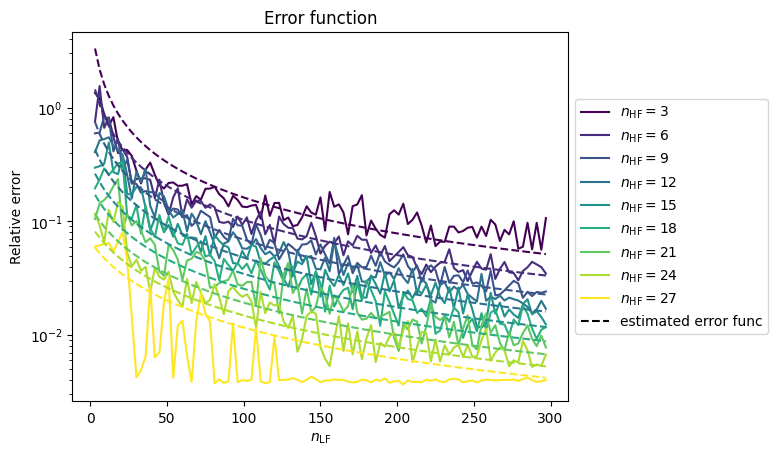

In [141]:
# distinct colors
colors = plt.cm.viridis(np.linspace(0, 1, len(X[0])))

# plot the error function as curves
for i in range(len(X[0])):
    plt.plot(Y[:,0], Z[:, i], color=colors[i],label=r'$n_\mathrm{HF}=$' + str(int(X[0, i])))
# plot the error function as curves for different n_HF
for i in range(len(X[0])):
    plt.plot(Y[:,0], error_function(Y[:,0], X[0,i]), '--', color=colors[i])

plt.plot([],[], 'k--', label='estimated error func')
# adjust the legend location to outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend()
plt.yscale('log')
# plt.ylim(1e-3, 2)
plt.xlabel(r'$n_\mathrm{LF}$')
plt.ylabel('Relative error')
plt.title('Error function')
plt.show()